# Analyze 99co App Reviews with Webscrapping on Google Play Store

##### *if you just wanna see the conclusion , scroll to the bottom

### Preparation

In [9]:
!pip install google-play-scraper

  Using cached google_play_scraper-1.2.7-py3-none-any.whl.metadata (50 kB)
Using cached google_play_scraper-1.2.7-py3-none-any.whl (28 kB)


In [24]:
!pip install pymongo

   ---------------------------------------- 0.0/926.7 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/926.7 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 926.7/926.7 kB 3.9 MB/s eta 0:00:00


In [30]:
!pip install tzlocal

In [32]:
import pandas as pd

from google_play_scraper import app, Sort, reviews

from pprint import pprint

import pymongo
from pymongo import MongoClient

import datetime as dit
from tzlocal import get_localzone

import random
import time


In [36]:
client = MongoClient(host='localhost', port=27017)

app_proj_db = client['app_proj_db']

info_collection = app_proj_db ['info_collection']

review_collection = app_proj_db['review_collection']


In [38]:
rws, token = reviews(    
        'com.urbanindo.android',
        lang='id',  # Bahasa review (id = Indonesia)
        country='id',  # Negara (id = Indonesia)
        sort=Sort.NEWEST,  # Urutkan berdasarkan review terbaru
        filter_score_with=0,
        count=100  # Jumlah review per batch
       )


In [40]:
print(rws)

[{'reviewId': 'd5f8ad85-66ba-4f34-97c2-a8c565585497', 'userName': 'bigail agan', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIe8-FaSlhXz9aOIhC2GNRr5fU_Mk6s3gQu9p7jyCGwUvmsZBE=mo', 'content': 'Semakin ruwet tidak profesional setiap posting iklan selalu erorr keluar sendiri', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': '6.8.0', 'at': datetime.datetime(2024, 11, 14, 22, 19, 12), 'replyContent': 'Hai bigail agan, mohon maaf atas kendala yang dialami. Dapat kami informasikan bahwa saat ini untuk pasang iklan di 99.co kami sarankan untuk menggunakan browser di www.99.co/id Jika Anda masih menemukan kesulitan, jangan ragu untuk menghubungi kami melalui https://wa.me/6287722000203', 'repliedAt': datetime.datetime(2024, 11, 15, 11, 38, 24), 'appVersion': '6.8.0'}, {'reviewId': 'e65d62b4-e488-4d24-9a77-ccdd28414cd7', 'userName': 'Kevin P', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjURUd4iPCWG4_DtESPlR9Fv6zsFxaVLjFzg7lO6yQo3vrjOh1X4', 'content': 'App 

In [46]:
from google_play_scraper import reviews, Sort
from tqdm import tqdm

app_reviews = []

# ID 99co application
app_id = 'com.urbanindo.android'

# Loop untuk mengambil review berdasarkan skor dan urutan
for score in tqdm(range(1, 6)):  # Skor dari 1 hingga 5
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:  # Urutkan berdasarkan relevansi dan terbaru
        rvs, _ = reviews(
            app_id,
            lang='id',  # Bahasa review (id = Indonesia)
            country='id',  # Negara (id = Indonesia)
            sort=sort_order,  # Urutkan berdasarkan pilihan
            count=200 if score == 3 else 100,  # Jumlah review yang diambil
            filter_score_with=score  # Filter berdasarkan skor
        )
        for r in rvs:
            # Tambahkan metadata tambahan ke setiap review
            r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
            r['appId'] = app_id
            app_reviews.append(r)  # Simpan hasil ke daftar


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.03it/s]


In [48]:
len(app_reviews)

1200

In [50]:
app_reviews_df  = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

In [52]:
app_reviews_df.sample(20)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
606,a26d15e5-bb57-49d6-9a26-4ac1e91d9bd4,Anwar M Noor,https://play-lh.googleusercontent.com/a/ACg8oc...,"Bintang 3 dulu, kalo sdh clossing baru di kasi...",3,2,5.8.3,2021-06-10 16:42:46,"Hai Anwar M Noor, terima kasih telah menjadika...",2021-06-10 16:40:42,5.8.3,newest,com.urbanindo.android
900,03adfebb-adc4-49a7-a1e3-b009f83a3660,Aswendi Idris,https://play-lh.googleusercontent.com/a-/ALV-U...,"Halo admin, akhir"" ini apknya ko suka keluar s...",4,1,6.7.0,2024-08-15 17:59:51,"Hai Aswendi Idris, mohon maaf atas kendala yan...",2024-08-16 16:06:30,6.7.0,newest,com.urbanindo.android
138,95c856ca-b784-4730-9c28-31585ad66303,Djuwita Dewi,https://play-lh.googleusercontent.com/a/ACg8oc...,"Setiap kami mau uploadfoto kok macet , apa pen...",1,6,5.8.5,2022-01-01 16:58:10,"Hai Djuwita Dewi, mohon maaf atas kendala yang...",2022-01-11 15:04:32,5.8.5,newest,com.urbanindo.android
2,958b1dc2-77f6-4c45-8ce9-b12986c405fd,Ebhie Kribo,https://play-lh.googleusercontent.com/a-/ALV-U...,"99.co sering terjadi eror skrg, sudah isi semu...",1,24,6.5.1,2024-02-10 00:01:35,"Hai Ebhie Kribo, mohon maaf atas kendala yang ...",2024-02-15 10:21:37,6.5.1,most_relevant,com.urbanindo.android
383,a9a1dbc1-2b97-4ac6-a023-4b576614a1d6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ampuunnn....,2,8,2.6.0,2016-05-15 16:26:23,"Hi Acep,\nMohon maaf atas ketidaknyamanannya. ...",2016-08-15 16:06:33,2.6.0,newest,com.urbanindo.android
1060,19b11e0c-dc8d-407e-9f06-354289d40257,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terima kasih atas budi baik manajemen 99.co ya...,5,0,None,2020-02-18 22:39:16,"Hai Eddy Suryadi, terima kasih telah menjadika...",2020-03-30 16:56:29,None,most_relevant,com.urbanindo.android
379,1a328551-d61a-4b86-ac76-73fca1fb572e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lebih bagus olx bingitttsss.,2,0,None,2016-07-02 20:52:04,"Hi Sala,\nMohon maaf atas ketidaknyamanannya. ...",2016-08-15 15:49:31,None,newest,com.urbanindo.android
24,d9ce6582-4d67-4a9f-a310-5a1142c7b7ab,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kode verifikasi agak susah udh menunggu waktu ...,1,0,None,2020-04-18 08:09:26,"Hai Alisha Ayurizqina, Mohon maaf atas ketidak...",2020-05-13 11:26:02,None,most_relevant,com.urbanindo.android
193,7c6fece5-b4d3-4500-9a41-776f61c10ab0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apl nya bagus tapi untuk fervikasi no tlp tida...,1,2,5.7.2,2019-07-15 22:40:47,None,NaT,5.7.2,newest,com.urbanindo.android
938,2f7b64d3-309a-4255-8514-fd3cda72fa52,Helmi Risnandar,https://play-lh.googleusercontent.com/a-/ALV-U...,Ini gimana caranya biar dapat layanan premium....,4,0,None,2020-07-05 20:04:35,"Hai Helmi Risnandar, Untuk Layanan Premium den...",2020-07-09 08:50:47,None,newest,com.urbanindo.android


In [104]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1200 non-null   object        
 1   userName              1200 non-null   object        
 2   userImage             1200 non-null   object        
 3   content               1200 non-null   object        
 4   score                 1200 non-null   int64         
 5   thumbsUpCount         1200 non-null   int64         
 6   reviewCreatedVersion  881 non-null    object        
 7   at                    1200 non-null   datetime64[ns]
 8   replyContent          742 non-null    object        
 9   repliedAt             742 non-null    datetime64[ns]
 10  appVersion            881 non-null    object        
 11  sortOrder             1200 non-null   object        
 12  appId                 1200 non-null   object        
dtypes: datetime64[ns](

In [16]:
!pip install wordcloud

## Analyse Reviews with Score 1,2,&3

### Top 10 Words in Reviews with Score 1, 2, 3 in 2024

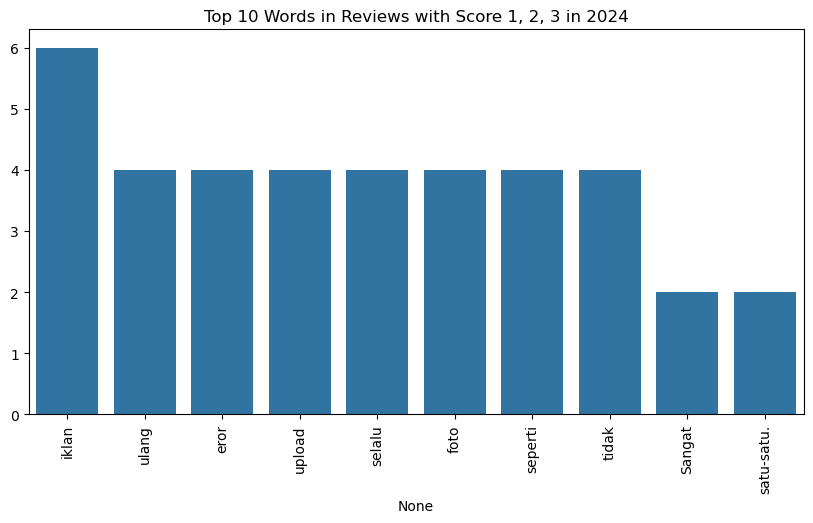

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data only on year 2024
filtered_reviews_2024 = filtered_reviews[filtered_reviews['at'].dt.year == 2024]

# Filter based on score 1, 2, or 3
filtered_reviews_score = filtered_reviews_2024[filtered_reviews_2024['score'].isin([1, 2, 3])]

# calculated words frequency on 'content' column
word_freq = filtered_reviews_score['content'].str.split(expand=True).stack().value_counts()

# Show 10 word that often appears 
plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq.head(10).index, y=word_freq.head(10).values)
plt.xticks(rotation=90)
plt.title("Top 10 Words in Reviews with Score 1, 2, 3 in 2024")
plt.show()


##### *Iklan = Advertisement

### Word Cloud of Reviews with Scores 1, 2, and 3 in 2024

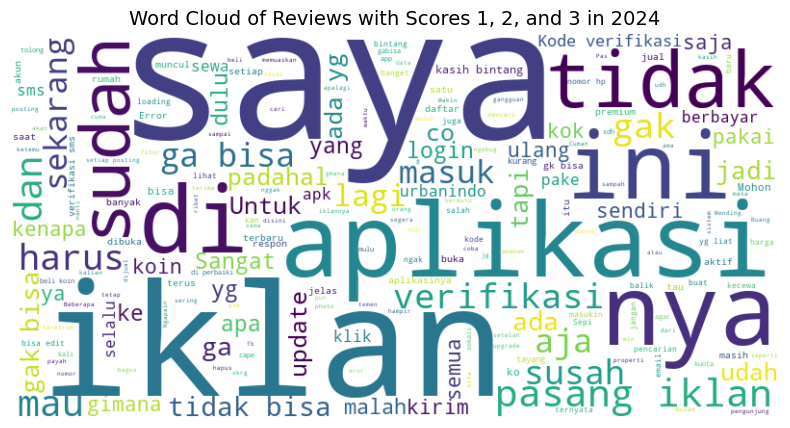

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the data only on 2024
filtered_reviews_2024 = filtered_reviews[filtered_reviews['at'].dt.year == 2024]

# Filter based on score 1, 2, or 3
filtered_reviews_score = filtered_reviews_2024[filtered_reviews_2024['score'].isin([1, 2, 3])]

#  Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews with Scores 1, 2, and 3 in 2024", fontsize=14)
plt.show()


## Complaints that contain the word 'Iklan' in the review

In [126]:

pd.set_option('display.max_colwidth', None)  

filtered_reviews_iklan = filtered_reviews[filtered_reviews['content'].str.contains('iklan', case=False, na=False)]

# Menampilkan hanya kolom 'content'
filtered_reviews_iklan_content = filtered_reviews_iklan[['content']]

# Tampilkan hasilnya
filtered_reviews_iklan_content.head(15)


,content
0,Semakin ruwet tidak profesional setiap posting iklan selalu erorr keluar sendiri
1,"Sebenarnya bagus. Cuman, saat pertama kali di buka, properti yg muncul di halaman pertama berbau ""premium"" dan ""super feature"". Untuk mencari iklan terbaru harus klik ""urutkan"" dan klik ""terbaru"". Bahkan, mencari iklan sendiri di pencarian saja gak ketemu, harus lewat filter baru bisa ketemu iklan sendiri. 9 Iklan saya sampai sekarang 0 Views padahal sudah 8 bulan tayang, akhirnya saya hapus semua.. Yang bilang sudah terjual berkat 99.co itu pasti berbayar muncul di halaman pertama WAJAR.."
2,"99.co sering terjadi eror skrg, sudah isi semua kolom siap untuk pasang iklan ternyata eror 403. Ditambah lagi upload foto gak bisa sekaligus seperti jaman urbanindo harus satu-satu. Sangat tidak efesien dan memakan banyak waktu."
4,"Saya turun kan bintang 5 ke bintang 1..maaf.. Ga tau kenapa,.sekarang setiap buka 99.co harus update,.setelah update,harus login,atau daftar,.padahal saya sudah punya user name,sperti dari awal ulang lagi,.daaann,.kembali lagi tidak bisa di akses,.saya mau posting iklan dan lihat iklan saya juga ga bisa,."
5,Tidak bisa verifikasi udh cape cape pasang iklan.. begtu suruh verifikasi gagal ajj. Kecewa. Aplikasi g berguna. Saya lagi mau jual kost an 9 kamar d kota bandung.. siapa tau ada yg minat. Untuk info lbh lanjut email ajja ya agan agan.. terima kasih
7,"Kenapa kode verifikasi nya tidak muncul? Sudah klik ""kirim ulang"" berkali kali tetap tidak muncul. Jadi iklan berstatus ""unverified"" dan tidak bisa tayang...jd mesti kasih bintang berapa?.."
8,saya sarankan jangan ada yg pakai ini aplikasi. trauma sales mereka sampai 3 org akan menghubungi anda dan bolak balik menawarkan agar iklan saya pakai yg berbayar. pdhal viewer 3 minggu cuma 15x di klik. yg klik itu sales aplikasi kalik dan data email pribadi kita di jual ama pihak 99.co setiap hari ada saja promo2 menyampah masuk iklan. beda kelas ama olx. ini aplikasi recehan
9,"Setiap posting photo rumah yg mau dijual selalu gak bisa. Jadi jualan rumahnya tanpa photo kan BUTUT wkwkwk ga bisa edit iklan, ga bisa edit ini itu.. makin ngaco aja wkwkwkwk"
11,gak bisa pasang iklan lagi dan iklan yang sudah terpasang gak bisa di update 😀 Udah jelas ini maksudnya untuk kedepan harus berbayar 😛🤣
12,"Padahal nomor hp sudah bener,tapi sms verifikasinya gak kekirim kirim,jadi nggak bisa pasang iklan ini gimana yaaaa"


# Conclusion

## One feature that must be upgraded is the Advertisement (Iklan) feature, as many users with ratings 1, 2, and 3 have complained about it. This feature should be improved to enhance the user experience and address their concerns.